In [49]:
###Our project will explore about the relationship of COVID-19 vaccination rate and mortality rate.
###We will use python code to test COVID-19 data

In [50]:
#import libraries before testing our collected data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas.core.arrays import integer
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [51]:
##import the csv data
df = pd.read_csv("5th_wave_statistics_single_day_with_age_final_1.csv", header=0)
df2 = pd.read_csv("COVID_19_number_final_1.csv", header=0)
df3 = pd.read_csv("vaccination_date_total_final_1.csv", header=0)
df4 = pd.read_csv("Received_and_Unvaccinated_1.csv", header=0)
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%y',errors='ignore')
df2['Date'] = pd.to_datetime(df2['Date'],format='%d/%m/%y',errors='ignore')
df3['Date'] = pd.to_datetime(df3['Date'],format='%d/%m/%y',errors='ignore')
df4['Date'] = pd.to_datetime(df4['Date'],format='%d/%m/%y',errors='ignore')
## for checking is the data import correctly
#df
#df2 
#df3 
#df4

# 新增區段

In [52]:
## merge dataset df, df2 and df3
combinDeadNum_CoivdNum = pd.merge(df,df2,how='right',on='Date')
combinAll = pd.merge(combinDeadNum_CoivdNum,df3,how='right',on='Date')
combinAll

,Date,Age groups,Received 2 or 3 doses (Single Day),Received 1 dose (Single Day),Unvaccinated (Single Day),Total (Single Day),Confirm,Asymptomatic Infection,RAT,Total,Dose_daily_total
0,10/3/2022,<3,0,0,0,0,5845,3714,7012,16571,76808
1,10/3/2022,3 to 11,0,1,-1,0,5845,3714,7012,16571,76808
2,10/3/2022,12 to 19,0,0,0,0,5845,3714,7012,16571,76808
3,10/3/2022,20 to 29,0,0,0,0,5845,3714,7012,16571,76808
4,10/3/2022,30 to 39,0,0,0,0,5845,3714,7012,16571,76808
...,...,...,...,...,...,...,...,...,...,...,...
215,31/3/2022,40 to 49,0,0,0,0,527,956,3787,5270,44049
216,31/3/2022,50 to 59,1,1,1,3,527,956,3787,5270,44049
217,31/3/2022,60 to 69,1,2,4,7,527,956,3787,5270,44049
218,31/3/2022,70 to 79,2,4,12,18,527,956,3787,5270,44049


In [53]:
## split the data to feature and target, split the data to train data and test data 
feature = combinAll.iloc[:, [0,1,9,10]].values ## using iloc method to select the feature value and put it into X and using values to return the df to numpy
label = df['Total (Single Day)'].values
feature_train, feature_test, label_train, label_test = train_test_split(
  feature, label, test_size=0.3, random_state=0) ## split the data to train and test data by 0.7 and 0.3


In [54]:
##Combine the dataset combinAll group by with Date
df5 = combinAll.groupby('Date').sum('Total (Single Day)')

#Total (Single Day) means the number of death
#Confirm means the confirmed cases of COVID-19
columns = df5.iloc[:, 3:5]
columns['Confirm'] = columns['Confirm'] / 10
print(columns)

           Total (Single Day)  Confirm
Date                                  
10/3/2022                 281   5845.0
11/3/2022                 294   5237.0
12/3/2022                 285   3755.0
13/3/2022                 261   4444.0
14/3/2022                 287   3986.0
15/3/2022                 289   3332.0
16/3/2022                 279   3231.0
17/3/2022                 289   1860.0
18/3/2022                 265   1840.0
19/3/2022                 249   1680.0
20/3/2022                 246   1265.0
21/3/2022                 223   1124.0
22/3/2022                 242   1041.0
23/3/2022                 205   1057.0
24/3/2022                 201   1625.0
25/3/2022                 192    962.0
26/3/2022                 139    764.0
27/3/2022                 153    686.0
28/3/2022                 167    602.0
29/3/2022                 151    439.0
30/3/2022                 136    664.0
31/3/2022                 120    527.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


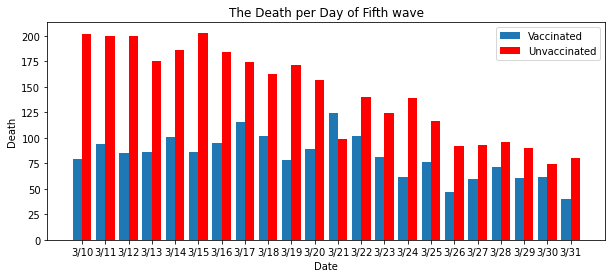

In [55]:
# Graph 1 complete
x5 =  df4['Date'] # set the x axis
y5 =  df4['Received of the Death'] # set y axis
b5 =  df4['Unvaccinated'] # set the second y axis
plt.figure(figsize=(10, 4)) # set the size of the bar chart
X_axis = np.arange(len(x5))
plt.bar(X_axis-0.2, y5,0.4 ,label='Vaccinated') # plot the bar of Vaccinated
plt.bar(X_axis+0.2, b5,0.4 ,color ='r', label='Unvaccinated') # plot the bar o fUnvaccinated
plt.title('The Death per Day of Fifth wave') # set the title of bar chart
plt.ylabel('Death') # set the label of bar chart
plt.xlabel('Date')# set the title of bar chart
plt.xticks(X_axis,['3/10','3/11','3/12','3/13','3/14','3/15','3/16','3/17','3/18','3/19','3/20'
,'3/21','3/22','3/23','3/24','3/25','3/26','3/27','3/28','3/29','3/30','3/31'])
plt.legend()
plt.show()

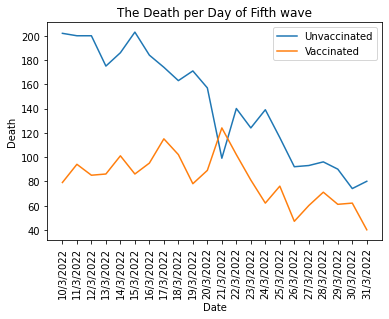

In [56]:
# Graph 2 complete
plt.plot(x5, b5,label='Unvaccinated') #Trend of Unvaccinated
plt.plot(x5, y5,label='Vaccinated') #Trend of Vaccinated
plt.title('The Death per Day of Fifth wave') # set the title of bar chart
plt.ylabel('Death') # set the label of bar chart
plt.xlabel('Date')# set the title of bar chart
plt.xticks(rotation =90)
plt.legend()
plt.show()

In [57]:
#Build up a model
combine = pd.merge(df2,df3,how='right',on='Date')
combind234 = pd.merge(combine,df4,how='right',on='Date')
combind234

,Date,Confirm,Asymptomatic Infection,RAT,Total,Dose_daily_total,Received of the Death,Unvaccinated,Total of Death
0,10/3/2022,5845,3714,7012,16571,76808,79,202,281
1,11/3/2022,5237,3443,10493,19173,80708,94,200,294
2,12/3/2022,3755,3124,11858,18737,68527,85,200,285
3,13/3/2022,4444,3359,19095,26898,51522,86,175,261
4,14/3/2022,3986,2720,14868,21574,70774,101,186,287
5,15/3/2022,3332,2537,15809,21678,68649,86,203,289
6,16/3/2022,3231,2717,14818,20766,65838,95,184,279
7,17/3/2022,1860,1752,13022,16634,66528,115,174,289
8,18/3/2022,1840,1561,12116,15517,72528,102,163,265
9,19/3/2022,1680,1368,9069,12117,60608,78,171,249


In [58]:
#split the data to training set and test set
feature = combind234.iloc[:, 4:8].values ## using iloc method to select the feature value and put it into X and using values to return the df to numpy
label = combind234['Total of Death'].values
feature_train, feature_test, label_train, label_test = train_test_split(
  feature, label, test_size=0.3, random_state=0) #split 0.7 is training set, 0.3 is test set
label_test

array([136, 246, 201, 205, 294, 120, 223])

In [59]:
#Multiple Linear Regression model
#Splitting the dataset
feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size=0.3, random_state=0)

#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(feature_train, label_train)

#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(feature, mlr.coef_))

#Prediction of test set
label_pred_mlr= mlr.predict(feature_test)
#Predicted values
print("Prediction for test set: {}".format(label_pred_mlr))

#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': label_test, 'Predicted value': label_pred_mlr})
mlr_diff.head()

#Model Evaluation
from sklearn import metrics
MeanAbErr = metrics.mean_absolute_error(label_test, label_pred_mlr)
MeanSqErr = metrics.mean_squared_error(label_test, label_pred_mlr)
RootMeanSqErr = np.sqrt(metrics.mean_squared_error(label_test, label_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(feature,label)*100))
print('Mean Absolute Error:', MeanAbErr)
print('Mean Square Error:', MeanSqErr)
print('Root Mean Square Error:', RootMeanSqErr)

Intercept:  1.4210854715202004e-13
Coefficients:
Prediction for test set: [136. 246. 201. 205. 294. 120. 223.]
R squared: 100.00
Mean Absolute Error: 3.654219783909087e-14
Mean Square Error: 1.730986214884963e-27
Root Mean Square Error: 4.160512245967993e-14


In [60]:
# using iloc method to select the feature value and put it into X and using values to return the df to numpy
feature = combind234.iloc[:,4:8].values
label = combind234.iloc[:,8:].values

In [61]:
# using StandardScaler function to scale the feature data to one standard
sc=StandardScaler()
feature_transform=sc.fit_transform(feature)

In [62]:
# function for predicted label
def predicted_label(weight,feature,intercept):
    label_lst=[]
    for i in range(len(feature)):
        label_lst.append(weight@feature[i]+intercept)
    return np.array(label_lst)

In [63]:
# linear loss for plot the graph
def loss(label,label_predicted):
    n=len(label)
    s=0
    for i in range(n):
        s+=(label[i]-label_predicted[i])**2
    return (1/n)*s

In [64]:
#derivative of loss weight
def dldw(feature,label,label_predicted):
    s=0
    n=len(label)
    for i in range(n):
        s+=-feature[i]*(label[i]-label_predicted[i])
    return (2/n)*s

In [65]:
# derivative of loss bias
def dldb(label,label_predicted):
    n=len(label)
    s=0
    for i in range(len(label)):
        s+=-(label[i]-label_predicted[i])
    return (2/n) * s

In [66]:
# gradient function
def gradient_descent(feature,label):
    weight=np.random.randn(feature.shape[1]) 
    intercept=0 #set the inital intercept(bias) = 0
    epoch = 2000 # set the iters to 2000
    n = len(feature) # col num of the feature
    linear_loss=[] # for save the data of loss to plot the graph
    learning_rate = 0.01 # learning rate (alpha)

    for i in range(epoch):
        label_predicted = predicted_label(weight,feature,intercept) # keep update the predicted data
        weight = weight - learning_rate *dldw(feature,label,label_predicted) # update the weight to find the final weight
        intercept = intercept - learning_rate * dldb(label,label_predicted) # update the intercept(bias) to find the final intercept(bias)
        linear_loss.append(loss(label,label_predicted)) # append all the loss data in linear_loss for the graph
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])# plot the line and set the x y label name
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight,intercept
    

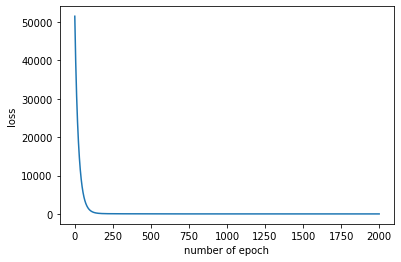

In [67]:
# excuit the gradient_descent function input feature_transform,label for the function
# use w and b to save the return value
w,b=gradient_descent(feature_transform,label)

In [68]:
# print the final weight and the final bias result for checking
print("weight:",w)
print("bias:",b)

weight: [ 0.37726776  0.12530941 20.49282412 43.46585313]
bias: [225.18181818]


In [69]:
# estimate the final predict label
label_pred=predicted_label(w,feature_transform,b)

In [70]:
# comparison of the actual label and the predict label by using dataframe
df_pred=pd.DataFrame(combind234.iloc[:,8:])
df_pred["label_actual"]=combind234.iloc[:,8:]
df_pred.pop("Total of Death")
df_pred["label_predicted"]=np.round(label_pred,1)
df_pred

,label_actual,label_predicted
0,281,280.8
1,294,294.0
2,285,284.9
3,261,261.4
4,287,287.1
5,289,289.0
6,279,279.1
7,289,288.9
8,265,265.0
9,249,248.7


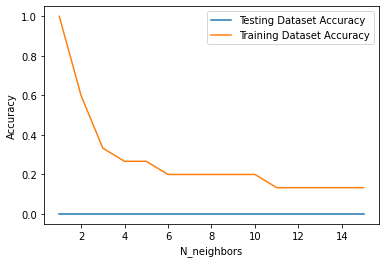

In [71]:
#k-NN algorithm
#Nomalize the variables
#Split into training and test set
feature = combind234.iloc[:, 4:8].values ## using iloc method to select the feature value and put it into X and using values to return the df to numpy
label = combind234['Total of Death'].values
feature_train, feature_test, label_train, label_test = train_test_split(
  feature, label, test_size=0.3, random_state=0)

n_neighbors = np.arange(1, 16)
train_accuracy = np.empty(len(n_neighbors))
test_accuracy = np.empty(len(n_neighbors))
error_rate = []
# Loop over K values
for i, k in enumerate(n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(feature_train, label_train)
     
# Compute training and test data accuracy
    train_accuracy[i] = knn.score(feature_train, label_train)
    test_accuracy[i] = knn.score(feature_test, label_test)

#Generate plot
plt.plot(n_neighbors, test_accuracy, label = 'Testing Dataset Accuracy')
plt.plot(n_neighbors, train_accuracy, label = 'Training Dataset Accuracy')

plt.legend()
plt.xlabel('N_neighbors')
plt.ylabel('Accuracy')
plt.show()

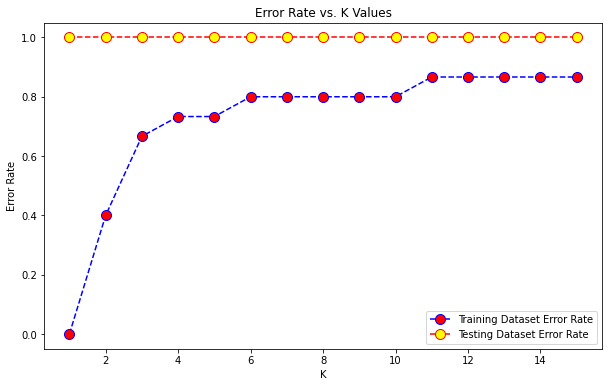

In [72]:
#Error Rate for k-NN
#Nomalize the variables
#Split into training and test set
feature = combind234.iloc[:, 4:8].values ## using iloc method to select the feature value and put it into X and using values to return the df to numpy
label = combind234['Total of Death'].values
feature_train, feature_test, label_train, label_test = train_test_split(
  feature, label, test_size=0.3, random_state=0)

#error_rate for train and test
error_rate_train = []
error_rate_test = []

#Loop over K values
for i in range(1,16):
#train
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(feature_train,label_train)
    pred_train = knn.predict(feature_train)
    error_rate_train.append(np.mean(pred_train != label_train))
#test
    pred_test = knn.predict(feature_test)
    error_rate_test.append(np.mean(pred_test != label_test))

#plotting graph of Error rate vs K value
plt.figure(figsize=(10,6))
plt.plot(range(1,16),error_rate_train,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10, label = 'Training Dataset Error Rate')
plt.plot(range(1,16),error_rate_test,color='red', linestyle='dashed', marker='o',
 markerfacecolor='yellow', markersize=10, label = 'Testing Dataset Error Rate')
plt.title('Error Rate vs. K Values')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.legend()